## Libraries

In [9]:
import os

import numpy as np
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2

import sys
sys.path.append('../Bacteria_finder')

## Pipeline

In [63]:
def Grayscaling(bacteria):
    return cv2.cvtColor(bacteria, cv2.COLOR_BGR2LAB)[:,:,0]

def Main_pipeline(file_name):
    bacteria = cv2.imread(file_name)

    fig, axs = plt.subplots(3, 2, figsize=(14,10))
    fig.suptitle(file_name)

    axs[0][0].imshow(cv2.cvtColor(bacteria, cv2.COLOR_BGR2RGB)) # Original image
    axs[0][0].set_title('Original image')
    axs[0][0].set_yticks([])
    axs[0][0].set_xticks([])
    
    one_channel_bacteria = Grayscaling(bacteria)
    axs[1][0].imshow(one_channel_bacteria, cmap=plt.cm.gray) # Grayscaled image
    axs[1][0].set_title('Grayscaled image')
    axs[1][0].set_yticks([])
    axs[1][0].set_xticks([])

    axs[2][0].hist(one_channel_bacteria.flatten(), bins=[el for el in range(256)], range=(0,256)) # Image histogram
    axs[2][0].set_title('Image histogram')

    one_channel_bacteria_filtered = cv2.GaussianBlur(one_channel_bacteria, (5,5), 0)
    axs[0][1].imshow(one_channel_bacteria_filtered, cmap=plt.cm.gray) # Filtered grayscaled image
    axs[0][1].set_title('Filtered grayscaled image')
    axs[0][1].set_yticks([])
    axs[0][1].set_xticks([])

    axs[1][1].hist(one_channel_bacteria_filtered.flatten(), bins=[el for el in range(256)], range=(0,256)) # Image histogram
    axs[1][1].set_title('Image histogram')

    threshold_value, one_channel_bacteria_filtered_thresholded = cv2.threshold(one_channel_bacteria_filtered,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    axs[1][1].axvline(threshold_value, color = 'black') # Plotting threshold value
    axs[2][1].imshow(one_channel_bacteria_filtered_thresholded, cmap=plt.cm.gray) # Thresholded filtered grayscaled image
    axs[2][1].set_title('Thresholded filtered grayscaled image')
    axs[2][1].set_yticks([])
    axs[2][1].set_xticks([])

## Testing pipeline

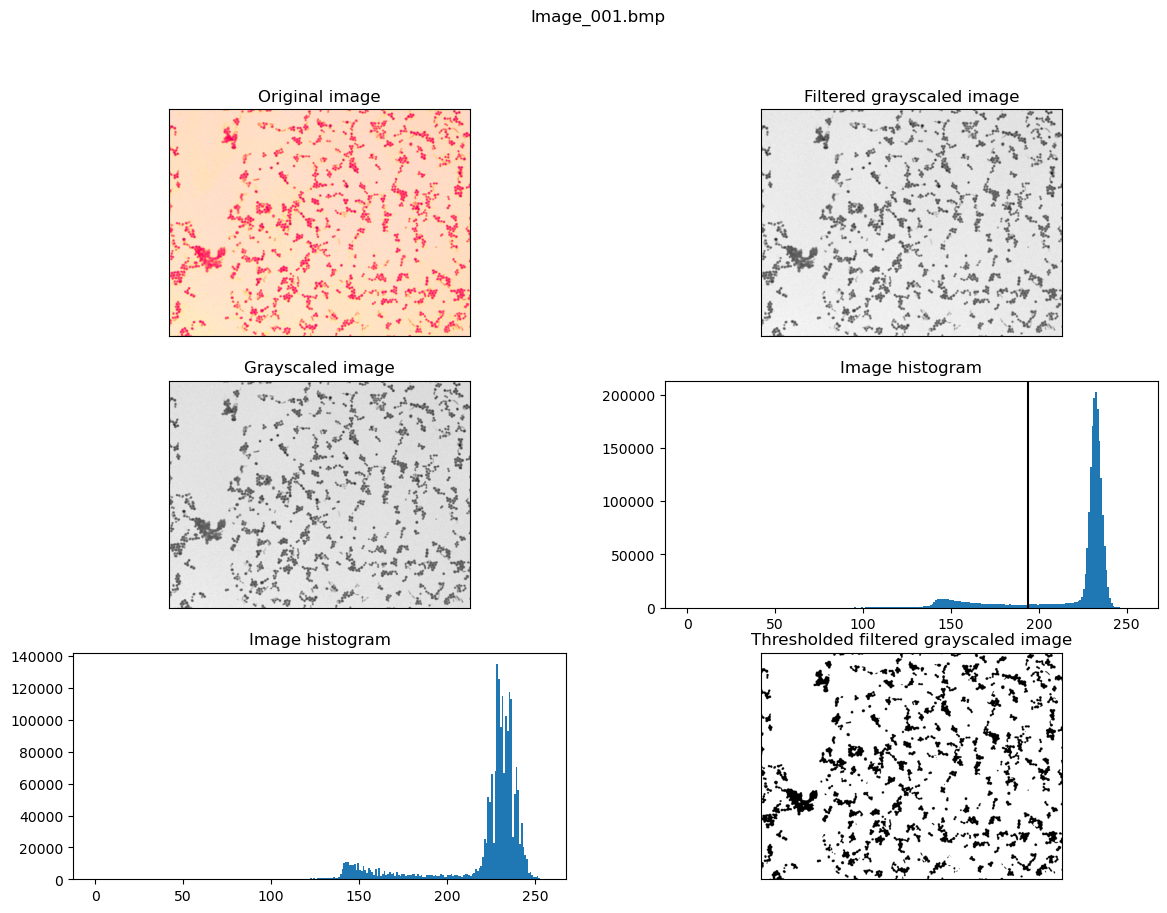

In [64]:
Main_pipeline('Image_001.bmp')

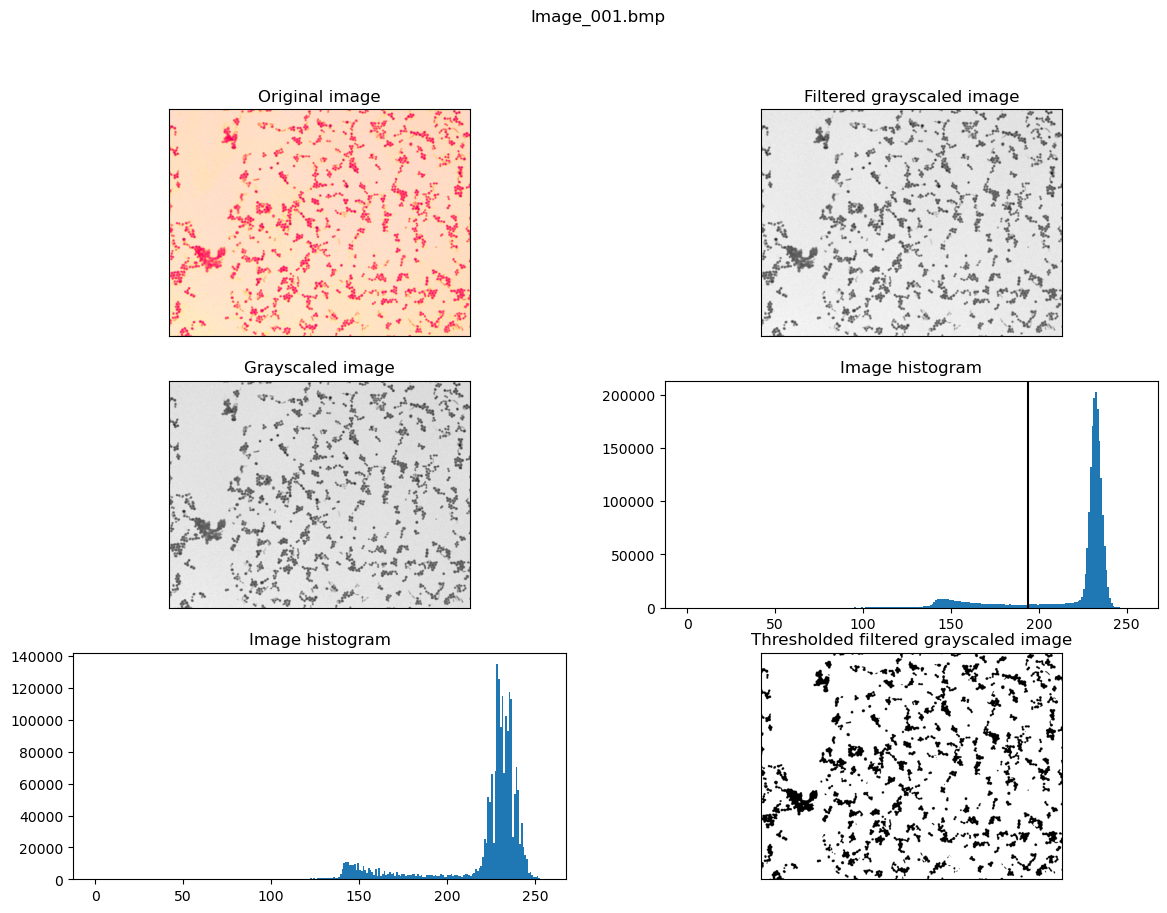

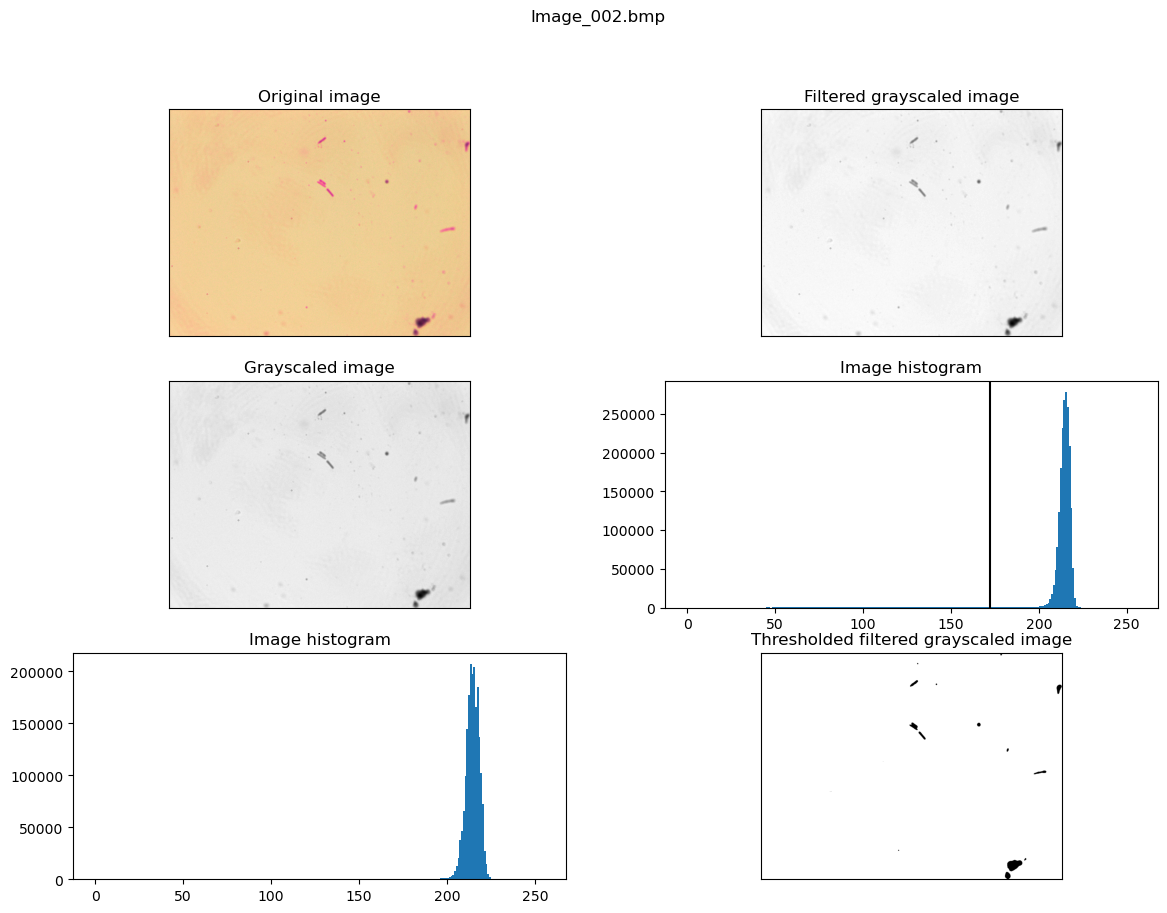

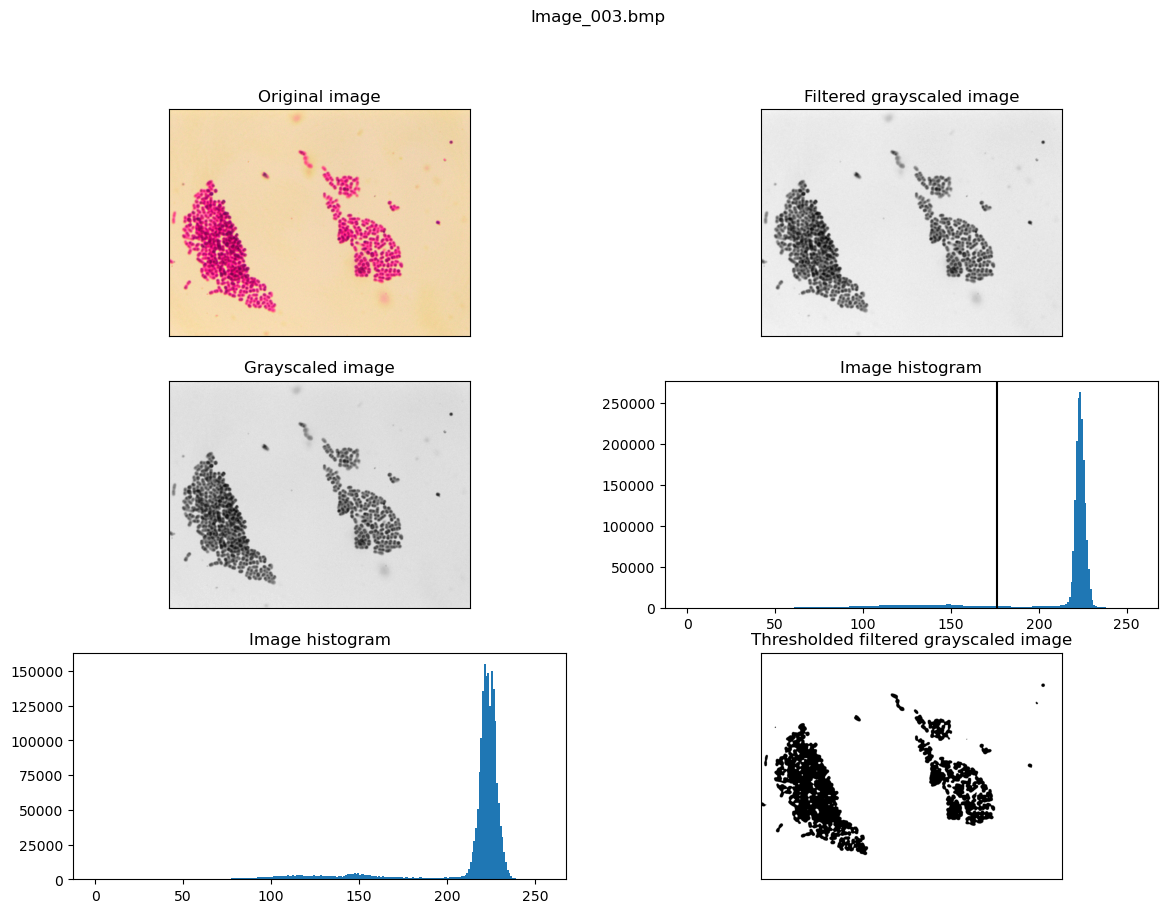

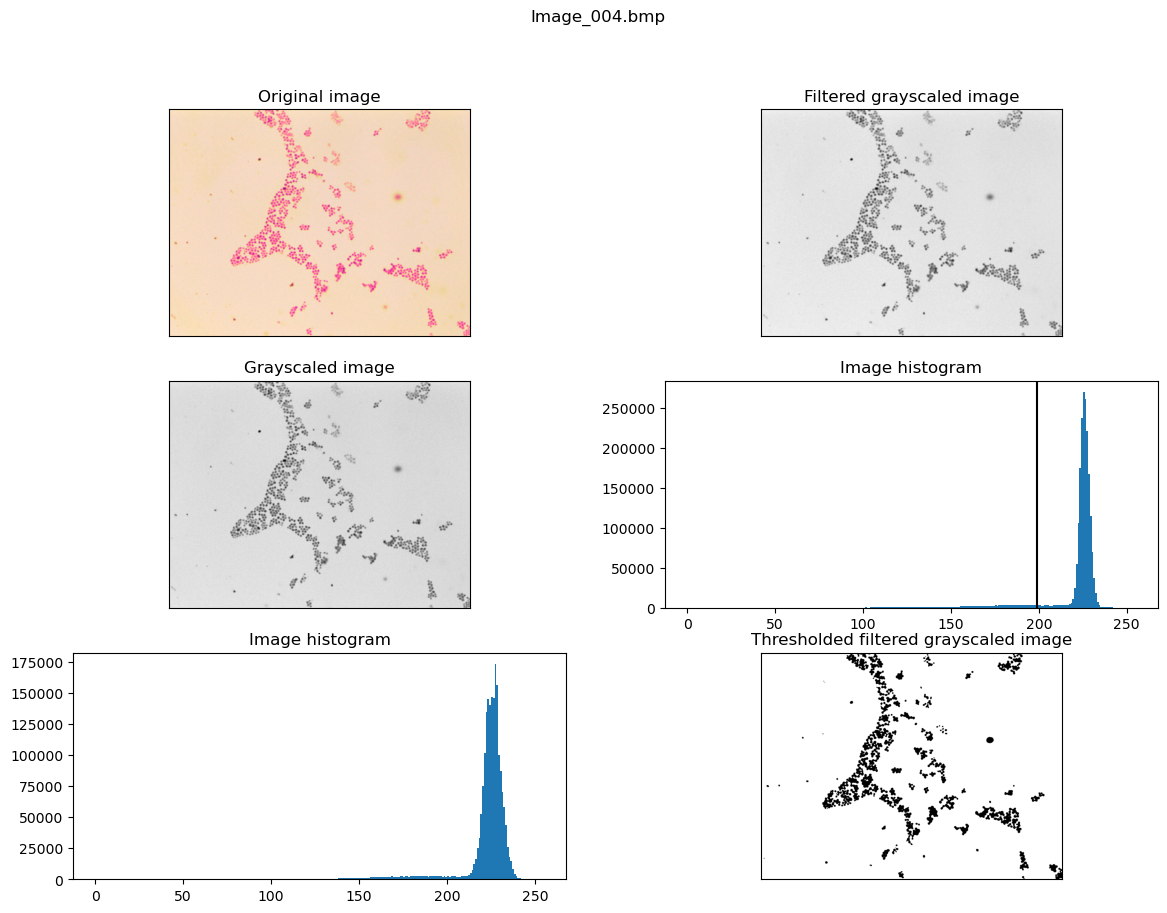

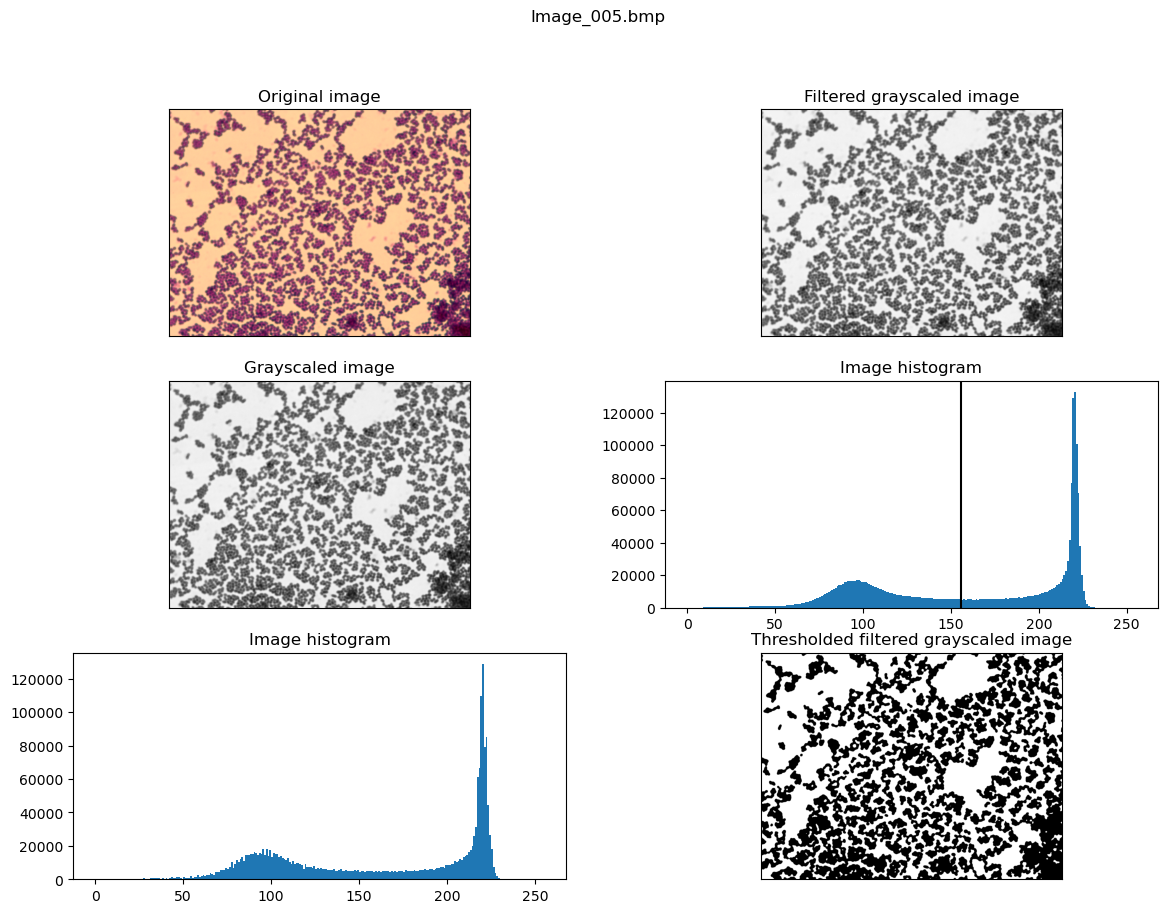

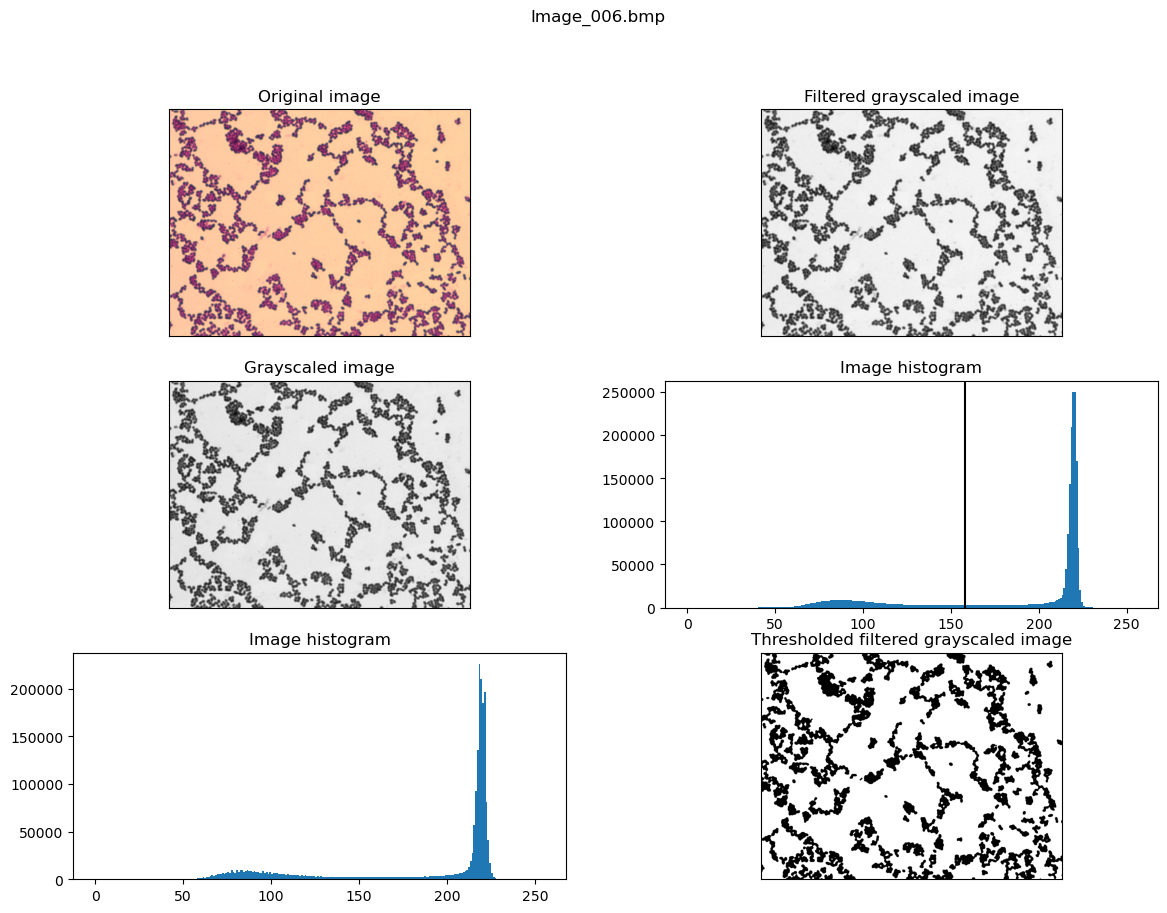

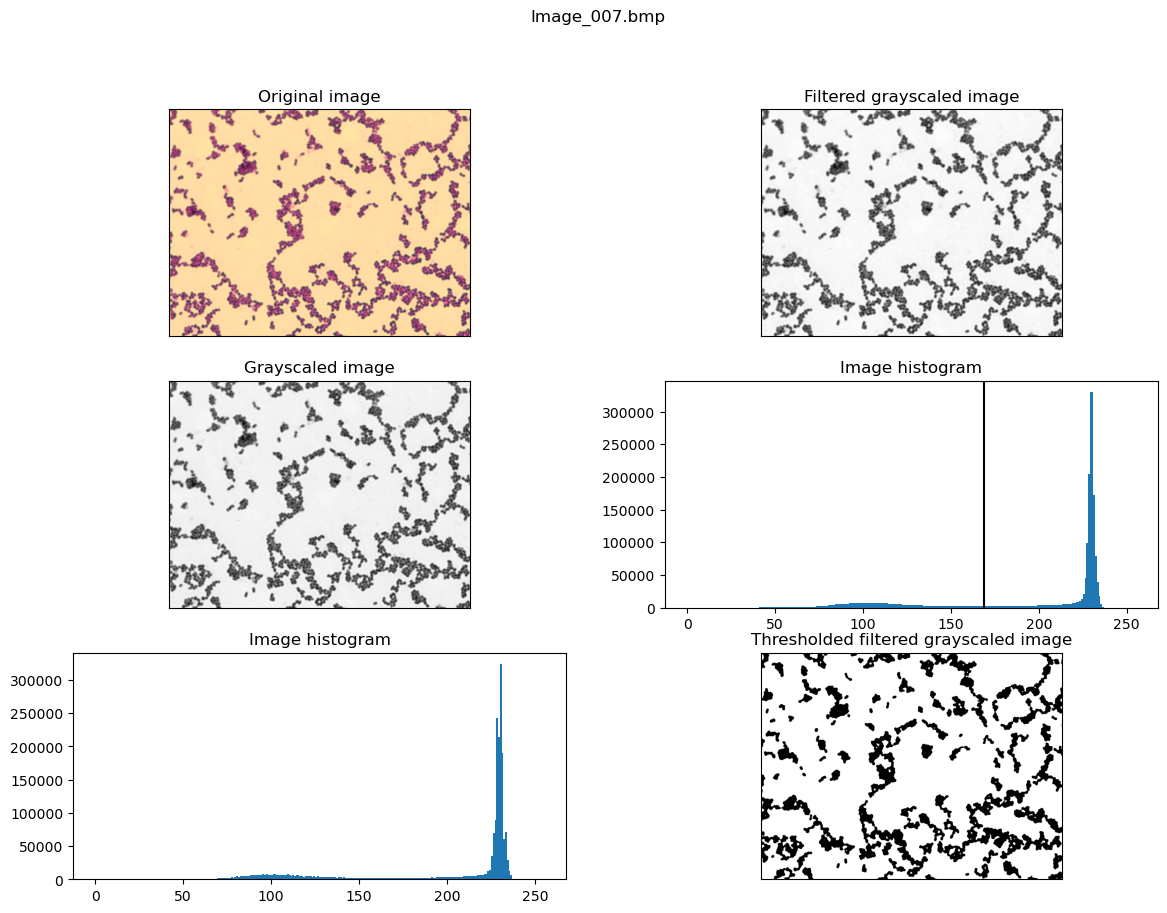

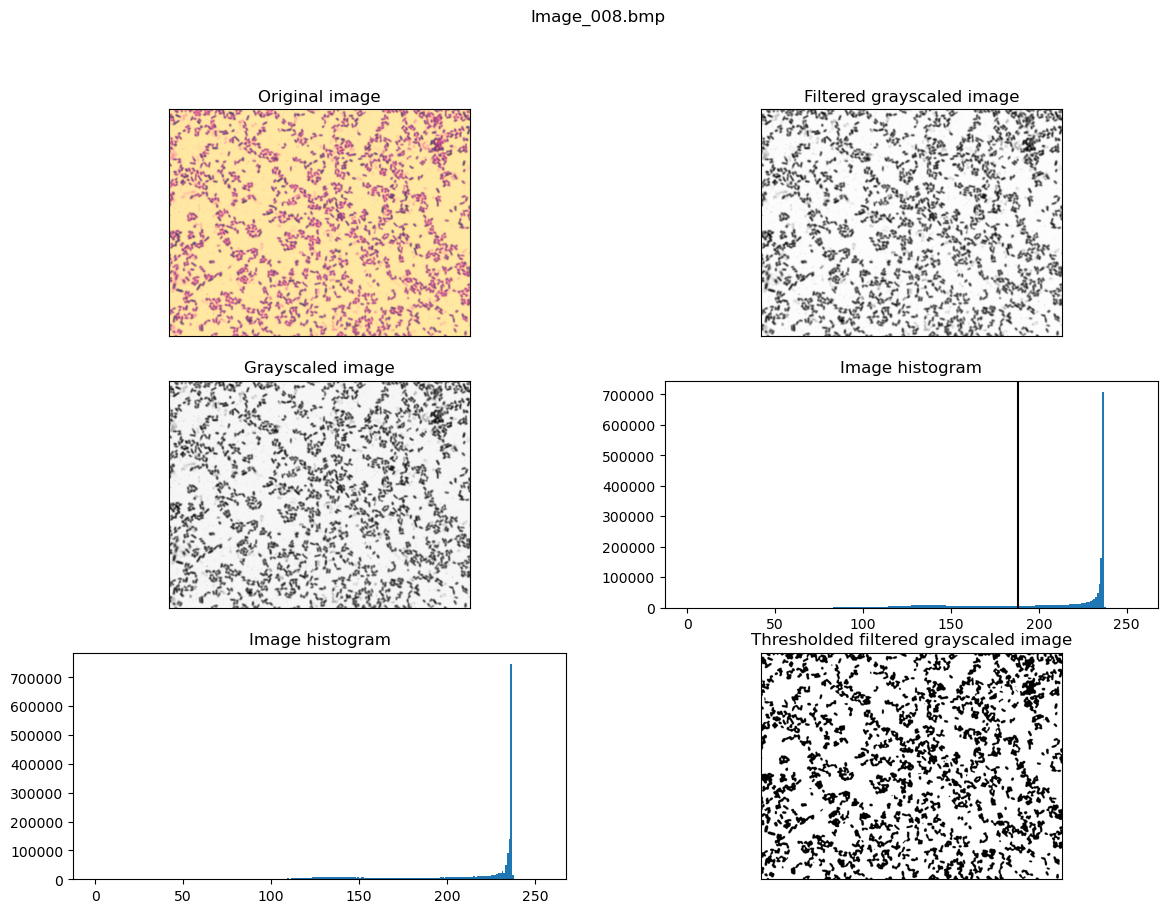

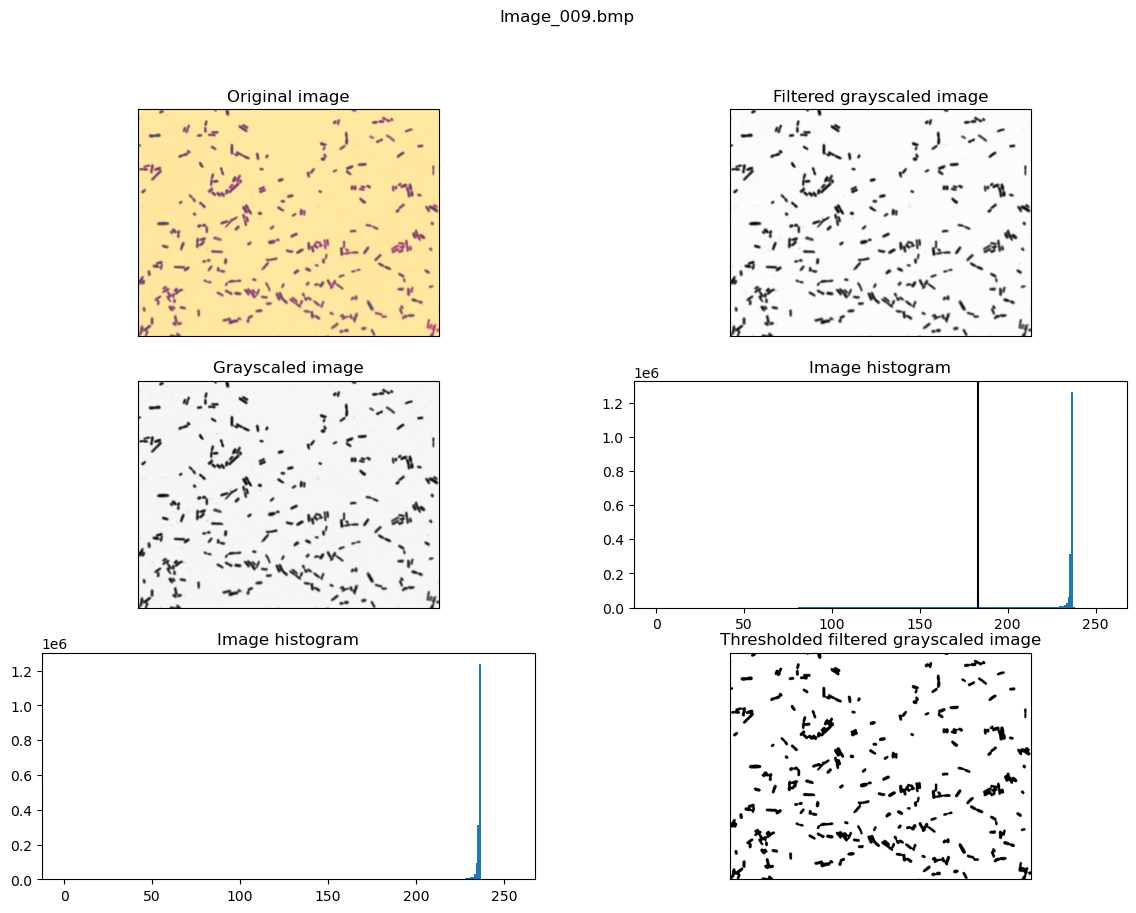

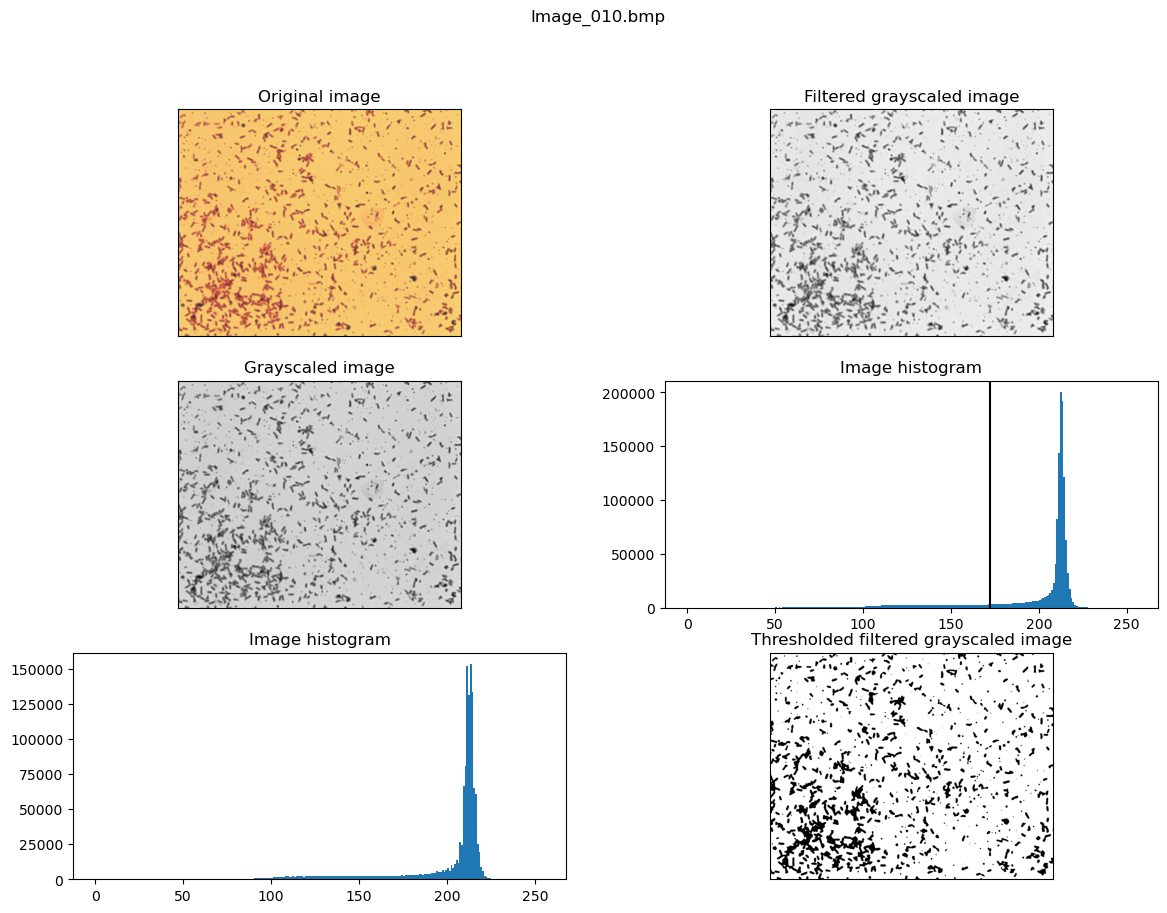

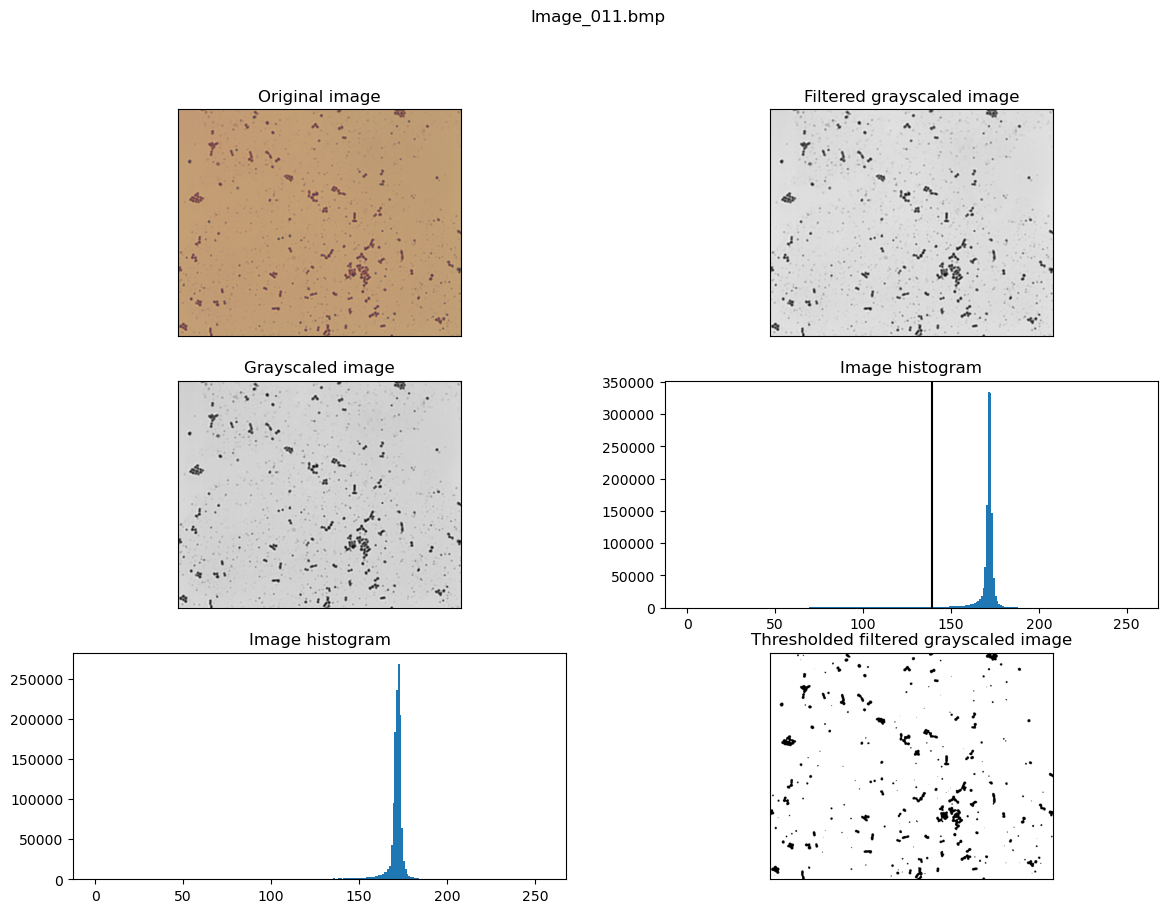

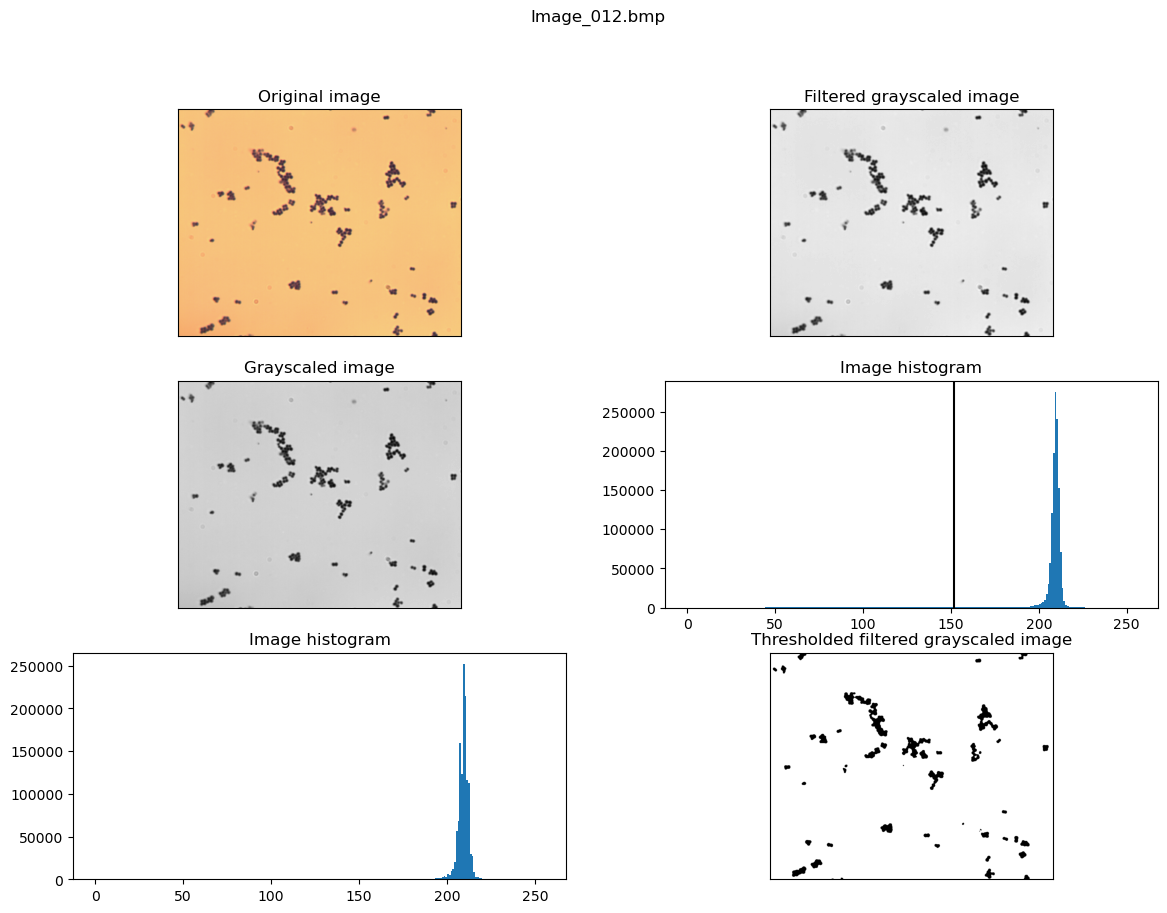

In [65]:
for index in range(1, 13):
    if index/10 < 1:
        Main_pipeline('Image_00' + str(index) + '.bmp')
    else:
        Main_pipeline('Image_0' + str(index) + '.bmp')